In [1]:
import numpy as np
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# Define a function to be explored

def f(x):
    #x = x.reshape(len(x),)
    return np.sin((x / (2*np.pi)) **2)
    #return (1 / (2*np.pi))*x*np.sin(x**2)-x*np.cos(np.sin(np.cos(x)))+(1-np.abs(np.sin(x)))*x

# Define a prior

# Define the kernel

def kernel(x, x_dash, l=1):
    sqdist = np.sum(x**2,1).reshape(-1,1)+np.sum(x_dash**2, 1)-2*np.dot(x, x_dash.T)
    return np.sqrt(1)*np.exp(-0.5 * sqdist / 1)

def fmu(x_star, x_train, y, l=1):
    """ 
    This is the expected value of all functions f*. It
    
    """
    SIGMA = 1e-6
    K_star = kernel(x_train, x_star, l=l)
    K_y = kernel(x_train, x_train, l=l)

    #K_y = np.linalg.inv(L).T*np.linalg.inv(L)*y
    
    L = np.linalg.cholesky(K_y+SIGMA**2*np.eye(len(K_y)))
    alfa = np.matmul(np.linalg.inv(L).T,np.matmul(np.linalg.inv(L),y))
    return np.matmul(K_star.T, alfa)
    

def fcovar(x_star, x_train, y, l=1):
    SIGMA = 0
    PRIOR_S = np.sqrt(10)
    PRIOR_S = 1
    K_star = kernel(x_train, x_star, l=l)
    K_y = kernel(x_train, x_train, l=l)
    L = np.linalg.cholesky(K_y+SIGMA**2*np.eye(len(K_y)))
    
    v = np.linalg.lstsq(L, K_star)[0]
    #return kernel(x_star, x_star)-np.matmul(v.T, v).reshape(-1,1)
    #return -np.matmul(K_star.T, np.matmul(np.linalg.inv(K_train), K_star))+kernel(x_star, x_star)
    s = kernel(x_star, x_star, l=l)-K_star.T.dot(np.linalg.inv(K_train).dot(K_star))
    s[s<0] = 0
    return s
    
    
    


# Calculate the mean and covariance in the GP



In [121]:
# Sample two points from this function

x_train = np.random.uniform(low=-10, high=10, size=(10,)).reshape(-1,1)
f_train = f(x_train)



In [126]:
%pdb off

# Calculate the kernel at these points
x_star = np.linspace(-10, 10, 100).reshape(-1, 1)


l_0 = 100
K_train = kernel(x_train, x_train,l=l_0)
K_star = kernel(x_train, x_star, l=l_0)

# Use this to calculate the mean and covariance of the GP
#x_star = np.array([0, 0.5, 6]).reshape(-1,1)

mu = fmu(x_star, x_train, f_train, l=l_0).reshape(-1)
var = fcovar(x_star, x_train, f_train, l=l_0)
x_star = x_star.reshape(-1)





Automatic pdb calling has been turned OFF


In [127]:
var

array([[  6.34644541e-01,   5.43776266e-01,   4.28963531e-01, ...,
          4.72474682e-10,   3.36653065e-10,   2.29561716e-10],
       [  5.43776266e-01,   4.76300182e-01,   3.83492024e-01, ...,
          5.02799097e-10,   3.58260164e-10,   2.44295468e-10],
       [  4.28963531e-01,   3.83492024e-01,   3.14704481e-01, ...,
          4.91575870e-10,   3.50263262e-10,   2.38842428e-10],
       ..., 
       [  4.72474682e-10,   5.02799097e-10,   4.91575870e-10, ...,
          9.26518329e-01,   9.27862943e-01,   8.86376248e-01],
       [  3.36653065e-10,   3.58260164e-10,   3.50263262e-10, ...,
          9.27862943e-01,   9.63289721e-01,   9.54891304e-01],
       [  2.29561716e-10,   2.44295468e-10,   2.38842428e-10, ...,
          8.86376248e-01,   9.54891304e-01,   9.83097956e-01]])

# Sample from this distribution

This distribution is given by 

$$f'(x) \tilde{} \mathcal{N}(\bf(x), K(x))$$ 



In [128]:
X = np.random.normal(loc=mu, scale=np.diag(np.sqrt(var)), size=(5,len(mu)))

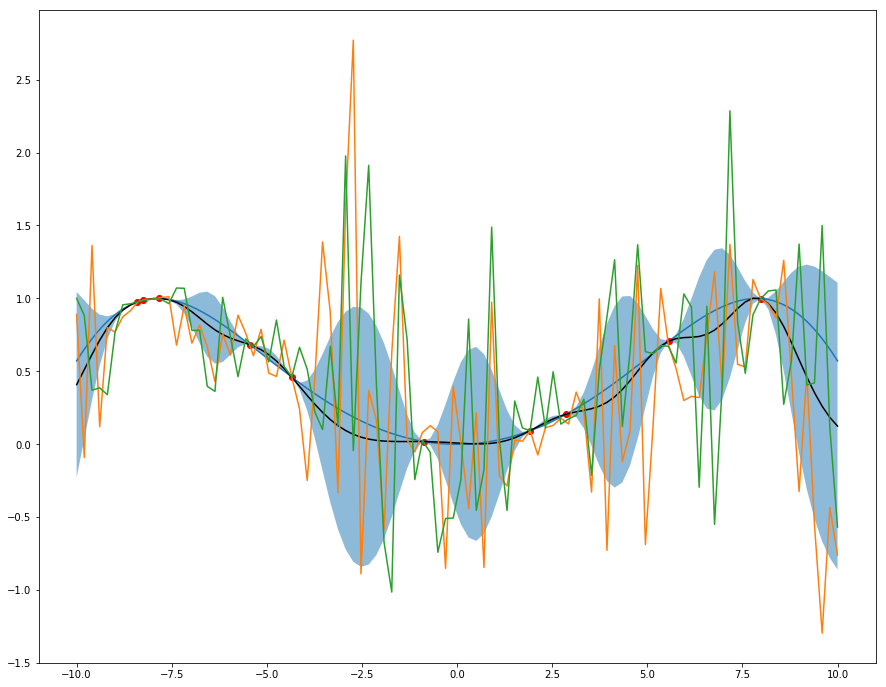

In [129]:
# Plot the complicated function
x_i = np.linspace(-10, 10,1000)
plt.figure(figsize=(15,12))
plt.plot(x_i, f(x_i))
plt.scatter(x_train, f_train,color='r')
plt.plot(x_star, mu, color='k')
plt.fill_between(x_star, np.diag(mu-var), np.diag(mu+var), alpha=0.5)
plt.plot(x_star, X[0,:])
plt.plot(x_star, X[1,:])

In [74]:
len(var[var<0])

4872